In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

## Matrix Determinant

In [2]:
mat1 = np.array([[1, 2], [1, 2]])
print(np.linalg.det(mat1))   # (1 * 2) - (1 * 2) = 0


mat2 = np.random.randint(-10, 10, (2, 2))
# reducing the rank using linear dependency in a row
mat2[:, 0] = mat2[:, 1]
print(round(np.linalg.det(mat2), 4))   # determinant will be 0

print("\n\n")

0.0
0.0





## Impact of Row swapping on the Determinant

In [3]:
mat3 = np.random.randint(-10, 10, (4, 4))
print("Before swap, Det(matrix) =\t", round(np.linalg.det(mat3), 4), "\n")       # original determinant


# 1st row swap (1st row swapped with the second row)
mat4 = mat3[[1, 0, 2, 3]]
print("After 1 swap, Det(matrix) =\t", round(np.linalg.det(mat4), 4), "\n")      # must be negative of the original determinant

# 2nd row swap (3rd row swapped with the second row)
mat5 = mat3[[1, 2, 0, 3]]
print("After 2 swaps, Det(matrix) =\t", round(np.linalg.det(mat5), 4), "\n\n")   # must be equal to the original determinant
print("\n\n")

Before swap, Det(matrix) =	 -4653.0 

After 1 swap, Det(matrix) =	 4653.0 

After 2 swaps, Det(matrix) =	 -4653.0 







## Determinant of Shifted Matrices

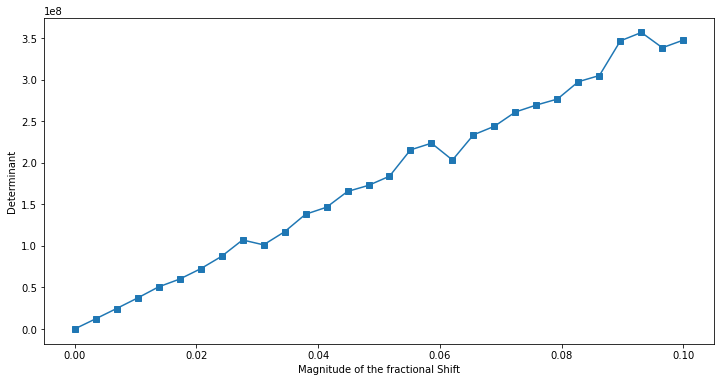

In [4]:
# size
m = 10

# shifting the matrix by x times tha Identity matrix, where x is in range [0, 0.1]
x = np.linspace(0, 0.1, 30)

# computing the absolute value of determinant 
# we will repeat the process 1000 times for a value of x and take the average

temp = np.zeros(1000)
determinants = np.zeros(len(x))  # we will have 30 determinants

for determinant_i in range(len(x)):
    
    # running 1000 iterations
    for i in range(1000):
        
        # generate a matrix
        mat6 = np.random.randint(-10, 10, (m, m))
        # adding a linear dependency
        mat6[:, 0] = mat6[:, 1]
        
        temp[i] = abs(np.linalg.det(mat6 + x[determinant_i] * np.eye(m)))
        
    # calculating the average of the 1000 determinants
    determinants[determinant_i] = np.mean(temp)

plt.figure(figsize=(12, 6))
plt.plot(x, determinants, 's-')
plt.xlabel("Magnitude of the fractional Shift")
plt.ylabel("Determinant")
plt.show()
print("\n\n")
# the more of the shift is added to the matrix, the higher the determinant of the matrix

## Det(AB) = Det(A) * Det(B)

In [5]:
# for static-sized matrix
mat7 = np.random.randint(-10, 10, (3, 3))
mat8 = np.random.randint(-10, 10, (3, 3))
mat9 = mat7 @ mat8

det1 = np.linalg.det(mat7) * np.linalg.det(mat8)
det2 = np.linalg.det(mat9)

print(det1, det2)

print("\n\n")

-2580.0000000000073 -2580.000000000053





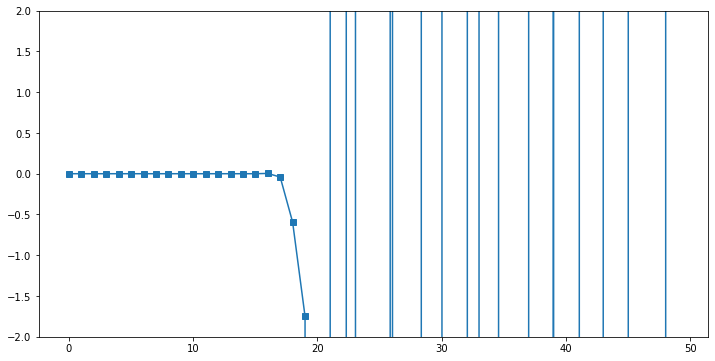

In [6]:
# for Dynamic-sized matrix

# variable for storing the determinants for LHS and RHS
determinants = np.zeros((50, 2))

for k in range(50):
    mat10 = np.random.randn(k, k)
    mat11 = np.random.randn(k, k)
    mat12 = mat10 @ mat11
    
    determinants[k, 0] = np.linalg.det(mat10) * np.linalg.det(mat11)
    determinants[k, 1] = np.linalg.det(mat12)
    
# plotting the difference between the two determinants 
plt.figure(figsize=(12, 6))
plt.plot(determinants[:, 0] - determinants[:, 1], 's-')


# we expect the difference to be very close to zero
# setting the limits on the y-axis

plt.ylim([-2, 2])
plt.show()
print("\n\n")

---
## Matrix Inverse

[[-0.7625  0.4922  0.2412]
 [-0.0881  1.1117  0.8062]
 [-0.2635  1.252   0.7578]] 


[[-1.6753 -0.7119  1.2906]
 [-1.4611 -5.1581  5.9531]
 [ 1.8317  8.2752 -8.0679]] 


[[ 1. -0. -0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]] 




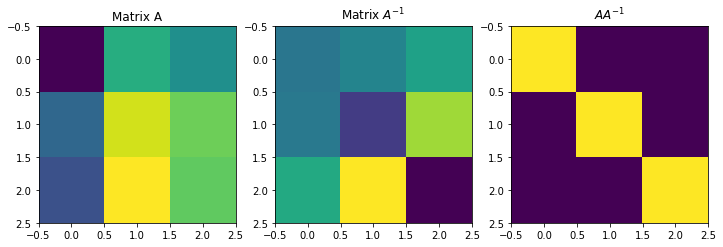

In [7]:
## If a matrix is invertible, it must be:
##    1) Square
##    2) Full rank, and
##    3) must have a non-zero Determinant value


# size variable
m = 3

# matrix A
mat13 = np.random.randn(m, m)
# matrix A inverse
mat14 = np.linalg.inv(mat13)

# A * A inverse
mat15 = mat13 @ mat14 

print(np.round(mat13, 4), "\n\n")
print(np.round(mat14, 4), "\n\n")
print(np.round(mat15, 4), "\n\n")   # mat15 must be an identity matrix



# Image of the matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(mat13)
plt.title("Matrix A")

plt.subplot(1, 3, 2)
plt.imshow(mat14)
plt.title("Matrix $A^{-1}$")

plt.subplot(1, 3, 3)
plt.imshow(mat15)
plt.title("$AA^{-1}$")

plt.show()
print("\n\n")

## Computing Inverse by row reduction

In [8]:
m = 4
mat16 = np.random.randint(-10, 10, (m, m))

# concatenate mat16 with an Identity matrix of same size (column wise)
mat17 = np.eye(m)                                           # Identity matrix
mat18 = Matrix(np.concatenate((mat16, mat17), axis = 1))    # for row reduction we will have convert the matrix into a sympy object

# using row reduction we will convert mat16 into Identity matrix and mat17 into the inverse of mat16
mat19 = mat18.rref()
mat19 = mat19[0]

# taking the second m X m matrix out
mat20 = mat19[:, m: m + m]

# method 2: using inverse function in the sympy module
mat21 = Matrix(mat16).inv()

mat20 - mat21  #          <---------------  must be a zero matrix

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

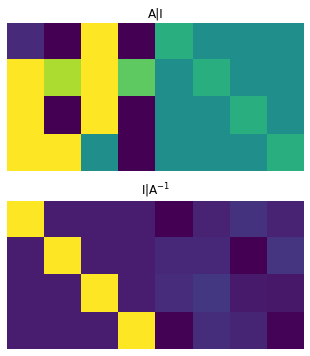

In [9]:
# Image of the concatenated/augmented matrices
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.imshow(matrix2numpy(mat18, dtype='float'), vmin = -4 , vmax = 4)
plt.title('A|I'), plt.axis(False)

plt.subplot(212)
plt.imshow(matrix2numpy(mat19, dtype='float'))
plt.title('I|A$^{-1}$'), plt.axis(False)

plt.show()
print("\n\n")

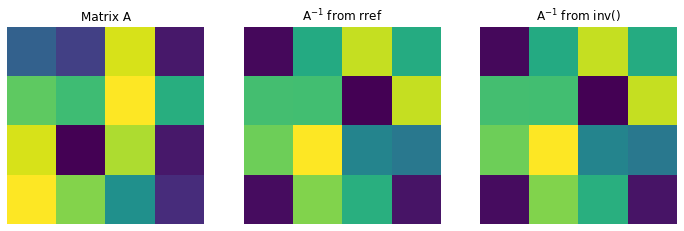

In [10]:
# Image of the matrix inverse
plt.figure(figsize=(12,6))


# the original matrix converted into a sympy object
plt.subplot(131)
plt.imshow(matrix2numpy(Matrix(mat16), dtype='float'))
plt.title('Matrix A'), plt.axis(False)


# matrix invesrse using row reduction
plt.subplot(132)
plt.imshow(matrix2numpy(mat20, dtype='float'))
plt.title('A$^{-1}$ from rref'), plt.axis(False)


# matrix inverse using the inv()
plt.subplot(133)
plt.imshow(matrix2numpy(mat21, dtype='float'))
plt.title('A$^{-1}$ from inv()'), plt.axis(False)

plt.show()
print("\n\n")

## Inverse of Diagonal matrices

In [11]:
# diagonal matrix
mat22 = np.diag([4, 5])
print(mat22, "\n\n")
mat23 = np.linalg.inv(mat22)
print(mat23, "\n\n")


mat24 = np.diag(np.arange(1, 5))
print(mat24, "\n\n")
mat25 = np.linalg.inv(mat24)
print(mat25, "\n\n")


## The inverse of a diagonal matrix is also a diagonal matrix and has the values that are inverse of the values in the original matrix 
## for example: mat23[0, 0] = 1 / mat22[0, 0]

[[4 0]
 [0 5]] 


[[0.25 0.  ]
 [0.   0.2 ]] 


[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]] 


[[1.         0.         0.         0.        ]
 [0.         0.5        0.         0.        ]
 [0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.25      ]] 




## One-sided Inverse for Rectangular Matrices- part 1

Tall Matrix:
Rank of A'A =  2
Rank of AA' =  2 


Test 1:
 [[ 1. -0.]
 [ 0.  1.]] 


Test 2:
 [[   6.5 -164.    19.5   21.5]
 [   1.5 -108.     4.5   22.5]
 [   2.  -160.     6.    34. ]
 [   3.5 -116.    10.5   18.5]] 




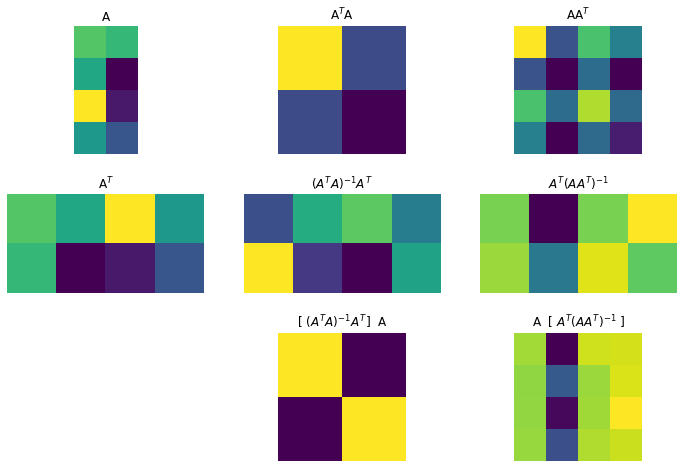

In [12]:
## If A is a matrix and A' is the transpose of matrix A, then A'A and AA' are always square matrices => A'A and AA' are invertible
## If (A'A)^-1 is the inverse of A'A, then (A'A) * (A'A)^-1 must be an identity matrix   
##    => (A'A)^-1 * (A'A) = I
##    => [(A'A)^-1 * A'] * A = I      => left inverse of A = (A'A)^-1 * A'    ; if A is a full column-rank matrix
##
## Similarly,   
## If (AA')^-1 is the inverse of AA', then (AA') * (AA')^-1 must be an identity matrix  
##    => (AA') * (AA')^-1 = I
##    => A * [A' * (AA')^-1] = I      => right inverse of A = A' * (AA')^-1   ; if A is a full row-rank matrix


################       for m > n (tall matrix), only the left inverse exists

m = 4
n = 2
mat26 = np.random.randint(1, 25, (m, n))      # A
mat27 = mat26.T                               # A'
mat28 = mat27 @ mat26                         # A'A
mat29 = mat26 @ mat27                         # AA'
print("Tall Matrix:")
# checking the ranks
print("Rank of A'A = ", np.linalg.matrix_rank(mat28))
print("Rank of AA' = ", np.linalg.matrix_rank(mat29), "\n\n")

mat30 = np.linalg.inv(mat28)                  # (A'A)^-1
mat31 = np.linalg.inv(mat29)                  # (AA')^-1

# calculating the left inverse: (A'A)^-1 * A'
left_inv_1 = mat30 @ mat27

# calculating the right inverse: A' * (AA')^-1
right_inv_1 = mat27 @ mat31

# testing the one-sided inverse
test_mat_1 = left_inv_1 @ mat26               # Does left-inverse * A = I ?  Yes
print("Test 1:\n", np.round(test_mat_1, 3), "\n\n")
test_mat_2 = mat26 @ right_inv_1              # Does A * right-inverse = I ?  No
print("Test 2:\n", np.round(test_mat_2, 3), "\n\n")


# image of matrices
plt.figure(figsize=(12, 8))

plt.subplot(331)
plt.imshow(mat26), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(mat28), plt.axis('off')
plt.title('A$^T$A')

plt.subplot(333)
plt.imshow(mat29), plt.axis('off')
plt.title('AA$^T$')

plt.subplot(334)
plt.imshow(mat27), plt.axis('off')
plt.title('A$^T$')

plt.subplot(335)
plt.imshow(left_inv_1), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(right_inv_1), plt.axis('off')
plt.title('$A^T(AA^T)^{-1}$')

plt.subplot(338)
plt.imshow(test_mat_1), plt.axis('off')
plt.title('[ $(A^TA)^{-1}A^T ]$  A')

plt.subplot(339)
plt.imshow(test_mat_2), plt.axis('off')
plt.title('A  [ $A^T(AA^T)^{-1}$ ]')

plt.show()
print("\n\n")

## One-sided Inverse for Rectangular Matrices- part 2

Wide Matrix:
Rank of A'A =  2
Rank of AA' =  2 


Test 3:
 [[-33.188 -23.375 -44.5   -52.438]
 [ 27.     20.5    36.5    50.5  ]
 [  5.25    3.5     7.      7.25 ]
 [  1.375   1.125   1.875   3.   ]] 


Test 4:
 [[ 1.  0.]
 [-0.  1.]] 




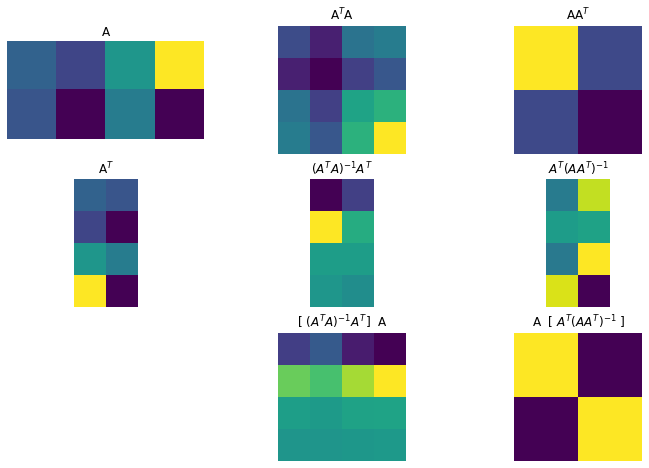

In [13]:
###############       for m < n (wide matrix), only the right inverse exists

m = 2
n = 4
mat32 = np.random.randint(1, 25, (m, n))      # A
mat33 = mat32.T                               # A'
mat34 = mat33 @ mat32                         # A'A
mat35 = mat32 @ mat33                         # AA'
print("Wide Matrix:")
# check for ranks
print("Rank of A'A = ", np.linalg.matrix_rank(mat32))
print("Rank of AA' = ", np.linalg.matrix_rank(mat33), "\n\n")

mat36 = np.linalg.inv(mat34)                  # (A'A)^-1
mat37 = np.linalg.inv(mat35)                  # (AA')^-1

# calculating the left inverse: (A'A)^-1 * A'
left_inv_2 = mat36 @ mat33
# calculating the right inverse: A' * (AA')^-1
right_inv_2 = mat33 @ mat37

# testing the one-sided inverse
test_mat_3 = left_inv_2 @ mat32                # Does left-inverse * A = I ?  Yes
print("Test 3:\n", np.round(test_mat_3, 3), "\n\n")
test_mat_4 = mat32 @ right_inv_2               # Does A * right-inverse = I ?  No
print("Test 4:\n", np.round(test_mat_4, 3), "\n\n")


## image of matrices
plt.figure(figsize=(12, 8))

plt.subplot(331)
plt.imshow(mat32), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(mat34), plt.axis('off')
plt.title('A$^T$A')

plt.subplot(333)
plt.imshow(mat35), plt.axis('off')
plt.title('AA$^T$')


plt.subplot(334)
plt.imshow(mat33), plt.axis('off')
plt.title('A$^T$')


plt.subplot(335)
plt.imshow(left_inv_2), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(right_inv_2), plt.axis('off')
plt.title('$A^T(AA^T)^{-1}$')

plt.subplot(338)
plt.imshow(test_mat_3), plt.axis('off')
plt.title('[ $(A^TA)^{-1}A^T ]$  A')

plt.subplot(339)
plt.imshow(test_mat_4), plt.axis('off')
plt.title('A  [ $A^T(AA^T)^{-1}$ ]')

plt.show()
print("\n\n")

## Pseudo-inverse

Rank 1: 40 
Rank 2: 39 




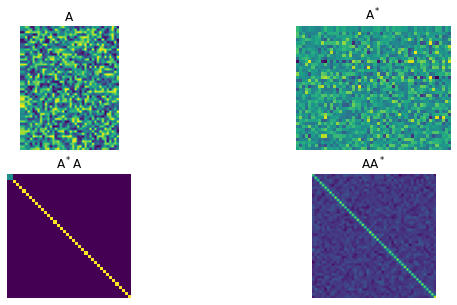

In [14]:
## If A* is the pseudo-inverse of A, then 
##   1) AA* != A*A
##   2) AA* and AA* may or may not equal to the Identity matrix, but will be very close to the Identity matrix

mat36 = np.random.randint(1, 25, (50, 40))      # A
rank_1 = np.linalg.matrix_rank(mat36)

# reducing the rank
mat36[:, 1] = mat36[:, 0]                       # column 2 = column 1
rank_2 = np.linalg.matrix_rank(mat36)

print("Rank 1:", rank_1, "\nRank 2:", rank_2, "\n\n")

# computing the pseudo-inverse
pseudo_inv_1 = np.linalg.pinv(mat36)            # A*


# image of the matrices
plt.figure(figsize=(10, 5))

plt.subplot(221)
plt.imshow(mat36), plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(pseudo_inv_1), plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(pseudo_inv_1 @ mat36), plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(mat36 @ pseudo_inv_1), plt.axis('off')
plt.title('AA$^*$')

plt.show()
print("\n\n")

## Does Pseudo-inverse = Inverse, if the Matrix is invertible?

In [15]:
## Yes!

m = 4
mat37 = np.random.randint(1, 20, (m, m))
pseudo_inv_2 = np.linalg.pinv(mat37)
inv = np.linalg.inv(mat37)

print(np.round(pseudo_inv_2, 3), "\n\n")
print(np.round(inv, 3), "\n\n")

[[-0.204  0.154 -0.057  0.165]
 [-0.04  -0.013 -0.063  0.104]
 [-0.172  0.054  0.028  0.139]
 [ 0.436 -0.188  0.123 -0.377]] 


[[-0.204  0.154 -0.057  0.165]
 [-0.04  -0.013 -0.063  0.104]
 [-0.172  0.054  0.028  0.139]
 [ 0.436 -0.188  0.123 -0.377]] 


